In [2]:
# %pip install prophet

In [3]:
# %pip install pystan

In [4]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from prophet import Prophet

In [6]:
df = pd.read_csv('Traffic_Junc/Junc2.csv')
df.head(20)

,DateTime,Junction,Vehicles,year
0,2015-11-01 00:00:00,2,6,2015
1,2015-11-01 01:00:00,2,6,2015
2,2015-11-01 02:00:00,2,5,2015
3,2015-11-01 03:00:00,2,6,2015
4,2015-11-01 04:00:00,2,7,2015
5,2015-11-01 05:00:00,2,2,2015
6,2015-11-01 06:00:00,2,4,2015
7,2015-11-01 07:00:00,2,4,2015
8,2015-11-01 08:00:00,2,3,2015
9,2015-11-01 09:00:00,2,3,2015


In [7]:
df.dtypes

DateTime    object
Junction     int64
Vehicles     int64
year         int64
dtype: object

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
year                 int64
dtype: object

In [9]:
df.drop('year', axis=1, inplace=True)

In [10]:
df.drop('Junction', axis=1, inplace=True)

In [11]:
df.columns = ['ds', 'y']

In [12]:
df

,ds,y
0,2015-11-01 00:00:00,6
1,2015-11-01 01:00:00,6
2,2015-11-01 02:00:00,5
3,2015-11-01 03:00:00,6
4,2015-11-01 04:00:00,7
...,...,...
14587,2017-06-30 19:00:00,34
14588,2017-06-30 20:00:00,35
14589,2017-06-30 21:00:00,31
14590,2017-06-30 22:00:00,29


In [13]:
m = Prophet(interval_width=0.85)
trained_model = m.fit(df)

01:16:13 - cmdstanpy - INFO - Chain [1] start processing
01:16:35 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=1000)
make_predictions = trained_model.predict(future)

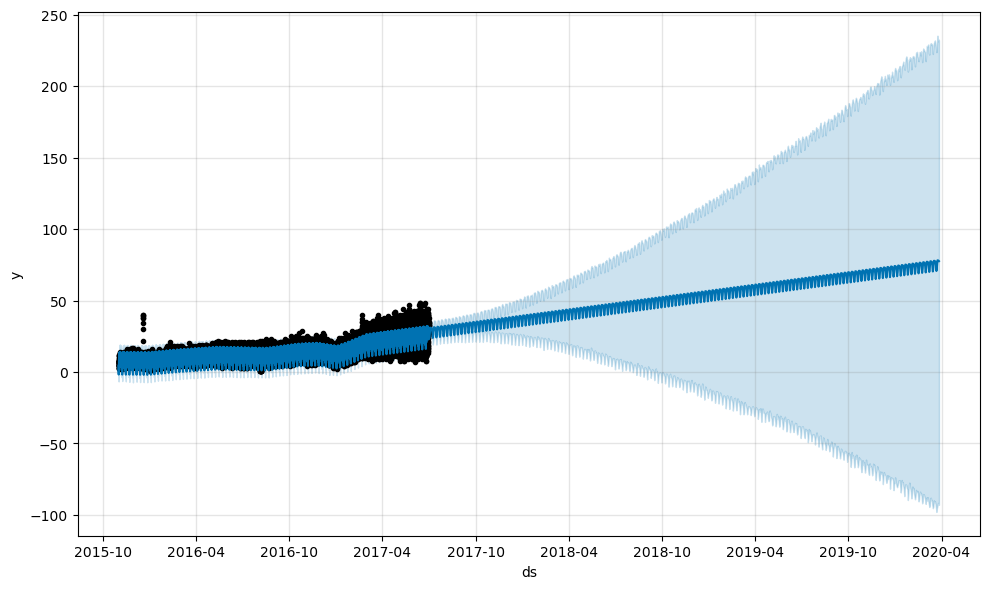

In [15]:
plot1 = m.plot(make_predictions)

In [16]:
import pandas as pd
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler


In [18]:
df = pd.read_csv('Traffic_Junc/Junc2.csv')


In [19]:
df1 = df['Vehicles']

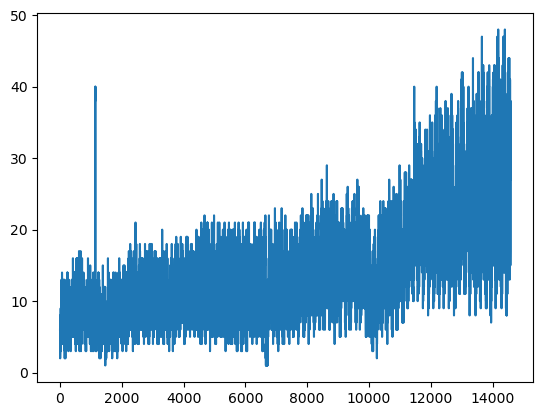

In [20]:
import matplotlib.pyplot as plt 

plt.plot(df1)

In [21]:
df1

0         6
1         6
2         5
3         6
4         7
         ..
14587    34
14588    35
14589    31
14590    29
14591    27
Name: Vehicles, Length: 14592, dtype: int64

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1

array([[0.10638298],
       [0.10638298],
       [0.08510638],
       ...,
       [0.63829787],
       [0.59574468],
       [0.55319149]])

In [24]:
training_size = int(len(df1)*0.65)
training_set, test_set = df1[:training_size,:], df1[training_size:len(df1),:1]

In [25]:
print(training_set)

[[0.10638298]
 [0.10638298]
 [0.08510638]
 ...
 [0.36170213]
 [0.38297872]
 [0.36170213]]


In [26]:
import numpy as np

def data_set(data_set, time_step=1):
    X, y = [], []

    for i in range(len(data_set)-time_step-1):
        a = data_set[i:(i+time_step), 0]
        X.append(a)
        y.append(data_set[i+time_step, 0])

    max_len = max(len(x) for x in X)
    X = np.array([np.pad(x, (0, max_len - len(x)), mode='constant') for x in X])
    y = np.array(y)

    return X, y


In [27]:
time_step = 150
X_train, y_train = data_set(training_set, time_step)
X_test, y_test = data_set(test_set, time_step)

In [28]:
print(X_train.shape)

(9333, 150)


In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], time_step, 1))
X_test = np.reshape(X_test, (X_test.shape[0], time_step, 1))


In [30]:
X_train.shape, X_test.shape

((9333, 150, 1), (4957, 150, 1))

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

2023-07-06 01:17:58.785502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(150,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2023-07-06 01:18:55.047853: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-07-06 01:18:57.788084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-06 01:18:57.791920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-06 01:18:57.7

In [33]:
model.fit(X_train, y_train, batch_size=64, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150


2023-07-06 01:19:00.445606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-06 01:19:00.448293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-06 01:19:00.452892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

146/146 [==============================] - ETA: 0s - loss: 0.0070

2023-07-06 01:21:41.093105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-06 01:21:41.096268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-06 01:21:41.098456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

146/146 [==============================] - 193s 1s/step - loss: 0.0070 - val_loss: 0.0203
Epoch 2/150
146/146 [==============================] - 189s 1s/step - loss: 0.0033 - val_loss: 0.0078
Epoch 3/150
146/146 [==============================] - 181s 1s/step - loss: 0.0028 - val_loss: 0.0060
Epoch 4/150
146/146 [==============================] - 183s 1s/step - loss: 0.0026 - val_loss: 0.0064
Epoch 5/150
146/146 [==============================] - 182s 1s/step - loss: 0.0025 - val_loss: 0.0060
Epoch 6/150
146/146 [==============================] - 159s 1s/step - loss: 0.0024 - val_loss: 0.0062
Epoch 7/150
146/146 [==============================] - 99s 680ms/step - loss: 0.0023 - val_loss: 0.0057
Epoch 8/150
146/146 [==============================] - 103s 704ms/step - loss: 0.0024 - val_loss: 0.0070
Epoch 9/150
146/146 [==============================] - 99s 676ms/step - loss: 0.0023 - val_loss: 0.0064
Epoch 10/150
146/146 [==============================] - 99s 681ms/step - loss: 0.0023 -

In [34]:
model.evaluate(X_test, y_test)

155/155 [==============================] - 50s 322ms/step - loss: 0.0198


0.019818808883428574

In [35]:
trained_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2023-07-06 10:03:12.658635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-06 10:03:12.687728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-06 10:03:12.691156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

155/155 [==============================] - 71s 456ms/step


In [36]:
trained_predict = scaler.inverse_transform(trained_predict)
test_predict = scaler.inverse_transform(test_predict)
